# <center><font color="blue">Modelación Cinemática y Aplicación de Algoritmos de Control Avanzado en Webots</font></center>


### <center>Luis F Recalde</center><center><font size="2"><i>Artil Robotics</i></font></center>

#### <center>Santo Domingo de los Colorados, 21 de Septiembre de 2020</center>

# <center><font color="red">Controlador No Lineal Basado en Lyapunov</font></center>

<div style="text-align: justify">A continuacion se presenta el modelo a utilizar en esta seccion, el cual se desarrollo en la practica anterior.</div>

\begin{equation*}
\begin{bmatrix}
\dot x(t) \\
\dot y(t) \\
\end{bmatrix}=
\begin{bmatrix}
\cos(\varphi) &-\sin(\varphi) & -a\sin(\varphi)-b\cos(\varphi) \\
\sin(\varphi) & \cos(\varphi) &  a\cos(\varphi)-b\sin(\varphi) \\
\end{bmatrix} 
\begin{bmatrix}
 v_l(t)\\
 v_m(t)\\
\omega(t) \\
\end{bmatrix}
\label{eq:8} \tag{8}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
\dot\varphi(t)
\end{bmatrix}=
\begin{bmatrix}
1
\end{bmatrix}
\begin{bmatrix}
\omega(t) \\
\end{bmatrix}
\label{eq:9} \tag{9}
\end{equation*}

<div style="text-align: justify">La ecuacion $\eqref{eq:8}$ puede ser escrita en su forma matricial como $\eqref{eq:10}$ y finalmente la ecuacion $\eqref{eq:9}$ queda representado como $\eqref{eq:11}$.</div>

\begin{equation*}
\mathbf{\dot{\eta}}=\mathbf{J}\mathbf{v}
\label{eq:10} \tag{10}
\end{equation*}

\begin{equation*}
\dot\varphi(t)=
\omega(t)
\label{eq:11} \tag{11}
\end{equation*}

<div style="text-align: justify">A continuación se realizará un control de seguimiento de trayectorias para lo cual se define a la trayectoria deseada como $\eta_{d}(t)$ y a la derivada de la trayectoria deseada como $\dot{\eta}_{d}(t)$.</div>

<div style="text-align: justify">Tomando en cuenta dichas consideraciones se define al error de control como:</div>

\begin{equation*}
\mathbf{\tilde{\eta}}=\eta_{d}(t)-\eta(t)
\label{eq:12} \tag{12}
\end{equation*}


<div style="text-align: justify">Derivando la ecuación del error con respecto al tiempo obtenemos:</div>


\begin{equation*}
\mathbf{\dot{\tilde{\eta}}}=\dot{\eta}_{d}(t)-\dot{\eta}(t)
\label{eq:13} \tag{13}
\end{equation*}

<div style="text-align: justify">Para realizar un controlador basado en Lyapunov primero se define una funcion candidata, la cual debe cumplir con las condiciones de Lyapunov <a href="https://es.wikipedia.org/wiki/Funci%C3%B3n_de_Liapunov">Lyapunov</a>, <a href="http://bionanouni.wdfiles.com/local--files/teaching-mt227-horario-2011i/ELymas.pdf">Lyapunov_Ejemplos</a>, <a href="http://www.dim.uchile.cl/~fbravo/guias/EDO/liapunov.pdf">Lyapunov_Teoria</a>.</div>

<div style="text-align: justify">Se propone la siguiente función candidata basada en los errores cuadráticos del sistema:</div>

\begin{equation*}
\mathbf{{V}}(\tilde{\eta})=\frac{1}{2}\tilde{\eta}(t)^T\tilde{\eta}(t)
\label{eq:14} \tag{14}
\end{equation*}

<div style="text-align: justify">Aplicando la derivada temporal de $\eqref{eq:14}$ se obtiene:</div>


\begin{equation*}
\mathbf{\dot{V}}(\tilde{\eta})=\tilde{\eta}(t)^T\dot{\tilde{\eta}}(t)
\label{eq:15} \tag{15}
\end{equation*}

<div style="text-align: justify">Remplazando la ecuación $\eqref{eq:13}$ en  $\eqref{eq:15}$ se obtiene:</div>

\begin{equation*}
\mathbf{\dot{V}}(\tilde{\eta})=\tilde{\eta}(t)^T(\dot{\eta}_{d}(t)-\dot{\eta}(t))
\label{eq:16} \tag{16}
\end{equation*}

<div style="text-align: justify">Remplazando la ecuación $\eqref{eq:10}$ en  $\eqref{eq:16}$ se obtiene:</div>

\begin{equation*}
\mathbf{\dot{V}}(\tilde{\eta})=\tilde{\eta}(t)^T(\dot{\eta}_{d}(t)-\mathbf{J}\mathbf{v})
\label{eq:17} \tag{17}
\end{equation*}

<div style="text-align: justify">Finalmente cuando se obtiene la ecuacion $\eqref{eq:17}$, lo importante es garantizar que esta funcion sea definida negativa, se tiene que encontrar una expresion para $\mathbf{v}$  que permita con dicha condicion.</div>

<div style="text-align: justify">La expresión para que cumple es la siguiente.</div>

\begin{equation*}
\mathbf{v}=\mathbf{J}^{-1}(\dot{\eta}_{d}(t)+K_{2}\tanh(K_{2}^{-1}K_{1}\tilde{\eta}(t)))
\label{eq:18} \tag{18}
\end{equation*}


\begin{equation*}
\mathbf{{\dot V}}(\tilde{\eta})=-\tilde{\eta}(t)^{T}K_2\tanh{(K_2^{-1}K_1\tilde{\eta}(t))}
\label{eq:19} \tag{19}
\end{equation*}

<div style="text-align: justify">Donde $K_{1}$ y $K_{2}$ son las ganancias del controlador.</div>

<div style="text-align: justify">Finalmente la ecuación será $\eqref{eq:18}$ nuestra ley de control la cual garantiza que $\eqref{eq:17}$ sea definida negativa si $K_1>0$ y $K_2>0$ por lo cual $\tilde{\eta}\to 0$  cuando $t\to \infty$.</div>

### Ley Control Redundancia para evasion obstaculos
<div style="text-align: justify">Se propone la siguiente ley de control que se basa en una solución de mínima norma; es decir que en cada instante el móvil cumplirá sus objetivos de navegación con el menor número de movimientos posibles.</div>

\begin{equation*}
\mathbf{v}=\mathbf{J}^{-1}(\dot{\eta}_{d}(t)+K_{2}\tanh(K_{2}^{-1}K_{1}\tilde{\eta}(t)))+(\mathbf{I}-\mathbf{J}^{-1}\mathbf{J})K_3\tanh(K_{3}^{-1}K_{4}\mathbf{\Lambda})
\label{eq:20} \tag{20}
\end{equation*}

\begin{equation*}
\mathbf{J}^{-1}=\mathbf{W}^{-1}\mathbf{J}^T(\mathbf{J}\mathbf{W}^{-1}\mathbf{J}^T)^{-1}
\label{eq:21} \tag{21}
\end{equation*}

<div style="text-align: justify">
El segundo término de  representa la proyección sobre el espacio nulo de la matriz Jacobiana, donde $\mathbf{\Lambda}$ es un vector arbitrario que contiene las velocidades asociadas al  móvil. Por lo que cualquier valor que tome $\mathbf{\Lambda}$ tendrá efectos únicamente en la estructura interna del manipulador móvil sin afectar en absoluto el control final sobre el extremo operativo $\mathbf{{\eta}}$.</div>


<div style="text-align: justify">Mediante este término se puede cumplir con otros objetivos paralelamente, que en esta practica seran de orientacion de la paltaforma.</div>

\begin{equation*}
\mathbf{\Lambda}=\begin{bmatrix}
0 &0 & \varphi_d - \varphi \\
\end{bmatrix}
\label{eq:22} \tag{22}
\end{equation*}

##  Implementación del Controlador

### Importar las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import time
import matplotlib as mpl

#### Tiempos para la simulacion

In [2]:
t_sample=0.1
t_final=10+t_sample
t=np.arange(0,t_final,t_sample)
t=t.reshape(1,t.shape[0])

### Parametros del robot omnidireccional 

In [3]:
a=0.15                         # se saco de las dimensiones reales del robot
b=-0.15                           # se como no se mueve en b es cero
c=0.2355                       # se saco de las dimensiones reales l
d=0.1880                       # se saco de las diensiones reales w
r=0.05                         # radio de las ruedas

### Cinematica 
Se inicializa los vectores vacios para que sean almacenados en cada instante de tiempo

In [4]:
xp=np.zeros((t.shape[0],t.shape[1]))
yp=np.zeros((t.shape[0],t.shape[1]))

### Velocidades Generales
Se inicializa los vectores vacios para que sean almacenados en cada instante de tiempo

In [5]:
ul=0.0*np.ones((t.shape[0],t.shape[1]))
um=0.0*np.ones((t.shape[0],t.shape[1]))
w=0*np.ones((t.shape[0],t.shape[1]))

### Velocidades Angulares cada Rueda
Se inicializa los vectores vacios para que sean almacenados en cada instante de tiempo

In [6]:
w_1=0*np.ones((t.shape[0],t.shape[1]))
w_2=0*np.ones((t.shape[0],t.shape[1]))
w_3=0*np.ones((t.shape[0],t.shape[1]))
w_4=0*np.ones((t.shape[0],t.shape[1]))

### Integracion
Se iniciliza los valores para que sean almacenados en cada instante de tiempo

In [7]:
x=np.zeros((t.shape[0],t.shape[1]+1))
y=np.zeros((t.shape[0],t.shape[1]+1))
phi=np.zeros((t.shape[0],t.shape[1]+1))

### Condiciones iniciales del sistema

In [30]:
phi[0,0]=(180*np.pi)/180
x_real=2
y_real=2
x[0,0]=x_real+a*np.cos(phi[0,0])-b*np.sin(phi[0,0])
y[0,0]=y_real+a*np.sin(phi[0,0])+b*np.cos(phi[0,0])

### Trayectoria deseada

In [45]:
xd=1*np.cos(0.5*t)
yd=1*np.sin(0.5*t)
phi_d=(45*np.pi)/180*np.ones((t.shape[0],t.shape[1]))

### Trayectoria deseada derivada

In [10]:
xd_p=-1*0.5*np.sin(0.5*t)
yd_p= 0.5*1*np.cos(0.5*t)

### Ganancias del controlador

In [12]:
k1=1
k2=0.4
k3=1
k4=1

### Errores de control

In [13]:
herrx=np.zeros((t.shape[0],t.shape[1]))
herry=np.zeros((t.shape[0],t.shape[1]))
qerr1=np.zeros((t.shape[0],t.shape[1]))

### Funcion del modelo del robot
En esta seccion se aplica la formula (16)

In [14]:
def Jacobiano(v,phi,a,b):
    J=np.matrix([[np.cos(phi),-np.sin(phi),-(a*np.sin(phi)+b*np.cos(phi))],[np.sin(phi),np.cos(phi),a*np.cos(phi)-b*np.sin(phi)]])
    hp=J*v
    return hp

### Integracion numerica del sistema

In [15]:
def euler(z,zp,t_sample):
    z=z+zp*t_sample
    return z

### Conversion de velocidades Generales a cada rueda
En esta seccion se utiliza la formula (13) 

In [16]:
def conversion(v,c,d,r):
    T=np.array([[1,1,c+d],[1,-1,-c-d],[1,-1,c+d],[1,1,-c-d]])*(1/r)
    tranformacion_ruedas=T@v
    return tranformacion_ruedas[0,0],tranformacion_ruedas[1,0],tranformacion_ruedas[2,0],tranformacion_ruedas[3,0]


### Controlador Basado en Lyapunov


In [17]:
def controlador(h,hd,hdp,q,a,b,k1,k2):
    K1=k1*np.eye(2,2)
    K2=k2*np.eye(2,2)
    herr=hd-h
    J=np.matrix([[np.cos(q[2,0]),-np.sin(q[2,0]),-(a*np.sin(q[2,0])+b*np.cos(q[2,0]))],[np.sin(q[2,0]),np.cos(q[2,0]),a*np.cos(q[2,0])-b*np.sin(q[2,0])]])
    control=np.linalg.pinv(J)@(hdp+K2@np.tanh(np.linalg.inv(K2)@K1@herr))
    return control[0,0], control[1,0], control[2,0]

### Controlador Basado en Lyapunov con objetivos secundarios

In [19]:
def controlador_secundario(h,hd,hdp,q,qd,a,b,k1,k2,k3,k4):
    K1=k1*np.eye(2,2)
    K2=k2*np.eye(2,2)
    K3=k3*np.eye(3,3)
    K4=k4*np.eye(3,3)
    
    W=np.eye(3,3)
    
    W_1=np.linalg.inv(W)
    
    herr=hd-h
    
    nulo=qd-q
    
    I=np.eye(3,3)
    
    J=np.matrix([[np.cos(q[2,0]),-np.sin(q[2,0]),-(a*np.sin(q[2,0])+b*np.cos(q[2,0]))],[np.sin(q[2,0]),np.cos(q[2,0]),a*np.cos(q[2,0])-b*np.sin(q[2,0])]])
    
    J_1=np.linalg.pinv(J)
    
    J_m=W_1@J.transpose()@np.linalg.inv(J@W_1@J.transpose())
    
    control=J_m@(hdp+K2@np.tanh(np.linalg.inv(K2)@K1@herr))+(I-J_m@J)@K3@np.tanh(np.linalg.inv(K3)@K4@nulo)
    
    return control[0,0], control[1,0], control[2,0]

### Bucle simulacion

In [46]:
for k in range(0,t.shape[1]):
    # Seccion para almacenar los valores de los errors del sistema
    herrx[0,k]=xd[0,k]-x[0,k]
    herry[0,k]=yd[0,k]-y[0,k]
    qerr1[0,k]=phi_d[0,k]-phi[0,k]
    # Definicion del vector de posiciones
    h=np.array([[x[0,k]],[y[0,k]]])

    #Definicion del vector de posiciones deseadas
    hd=np.array([[xd[0,k]],[yd[0,k]]])

    # Definicion de la derivada de la posicion deseada
    hdp=np.array([[xd_p[0,k]],[yd_p[0,k]]])
    
    # definicion del vector de controlador secundario
    q=np.array([[0],[0],[phi[0,k]]])
    
    #deficnion de los deseados del controlador secundario
    qd=np.array([[0],[0],[phi_d[0,k]]])
    
    #controlador basado en Lyapunov
    #ul[0,k],um[0,k],w[0,k]=controlador(h,hd,hdp,q,a,b,k1,k2)
 
    #controlador basado en Lyapunov
    ul[0,k],um[0,k],w[0,k]=controlador_secundario(h,hd,hdp,q,qd,a,b,k1,k2,k3,k4)
    
    ## Vector de velocidades del sistema
    v=np.array([[ul[0,k]],[um[0,k]],[w[0,k]]])
    
    # Conversion a las velociades de las ruedas
    
    w_1[0,k],w_2[0,k],w_3[0,k],w_4[0,k]=conversion(v,c,d,r)
    
    ## Velocidad del punto modelado
    hp=Jacobiano(v,phi[0,k],a,b)
    
    ## Obtener las velocidades en Cada eje
    xp[0,k]=hp[0,0]
    yp[0,k]=hp[1,0]
    
    ## Integracion numerica
    x[0,k+1]=euler(x[0,k],xp[0,k],t_sample)
    y[0,k+1]=euler(y[0,k],yp[0,k],t_sample)
    phi[0,k+1]=euler(phi[0,k],w[0,k],t_sample)

### Funcion para las graficas del sistema

In [22]:
def grafica(sty,titulo,x,y,etiqueta,ejex,ejey,color):
    mpl.style.use(sty)
    fig, ax = plt.subplots()
    ax.set_title(titulo.format(sty), color='0')
    ax.set_xlabel(ejex)
    ax.set_ylabel(ejey)
    ax.plot(x, y, color, label=etiqueta)
    ax.grid(linestyle='--', linewidth='0.2', color='black')
    legend = ax.legend(loc='upper right', shadow=False, fontsize='small')
    

### Funcion para las graficas del sistema con trayectoria

In [23]:
def grafica_c(sty,titulo,x,y,etiqueta,ejex,ejey,color,x_1,y_1,etiqueta_1,color_1):
    mpl.style.use(sty)
    fig, ax = plt.subplots()
    ax.set_title(titulo.format(sty), color='0')
    ax.set_xlabel(ejex)
    ax.set_ylabel(ejey)
    ax.plot(x, y, color,label=etiqueta)
    ax.plot(x_1,y_1,color_1,label=etiqueta_1)
    ax.plot()
    ax.grid(linestyle='--', linewidth='0.2', color='black')
    legend = ax.legend(loc='upper right', shadow=False, fontsize='small')

### Graficas del sistema
#### Trayectoria del robot

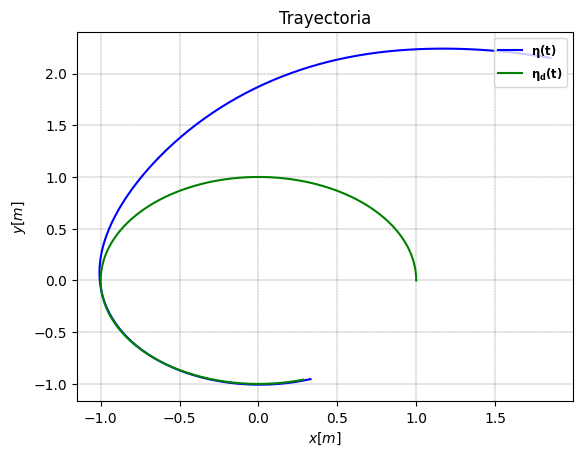

In [47]:
grafica_c('default','Trayectoria',x[0,:],y[0,:],'$\mathbf{\eta(t)}$','$x[m]$','$y[m]$','b',xd[0,:],yd[0,:],'$\mathbf{\eta_{d}(t)}$','g')

### Errores Primarios

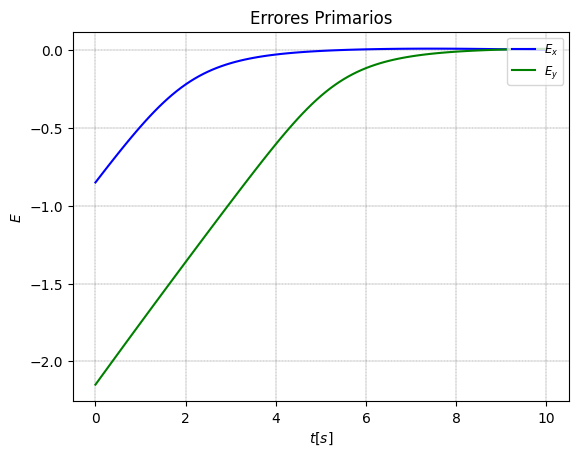

In [48]:
grafica_c('default','Errores Primarios',t[0,:],herrx[0,:],'$E_x$','$t[s]$','$E$','b',t[0,:],herry[0,:],'$E_y$','g')

### Evolucion Orientacion

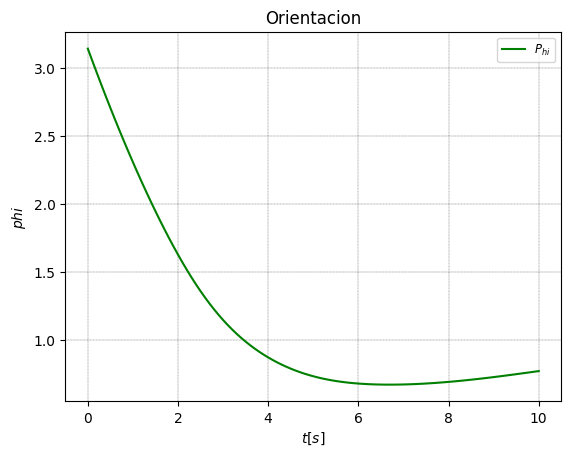

In [49]:
grafica('default','Orientacion',t[0,:],phi[0,0:(phi.shape[1]-1)],'$P_{hi}$','$t[s]$','$phi$','g')

### Errores Secundarios

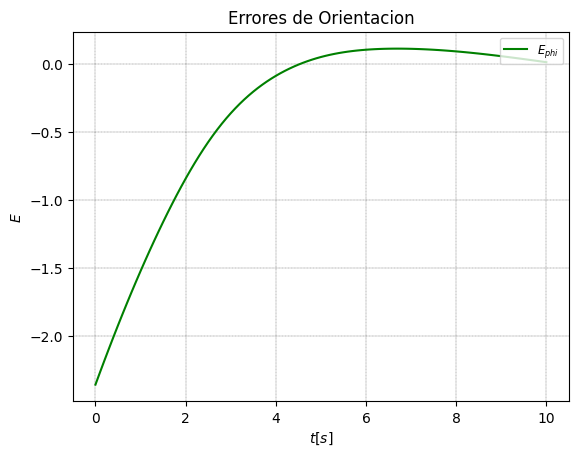

In [50]:
grafica('default','Errores de Orientacion',t[0,:],qerr1[0,:],'$E_{phi}$','$t[s]$','$E$','g')

#### Velocidades generales del robot

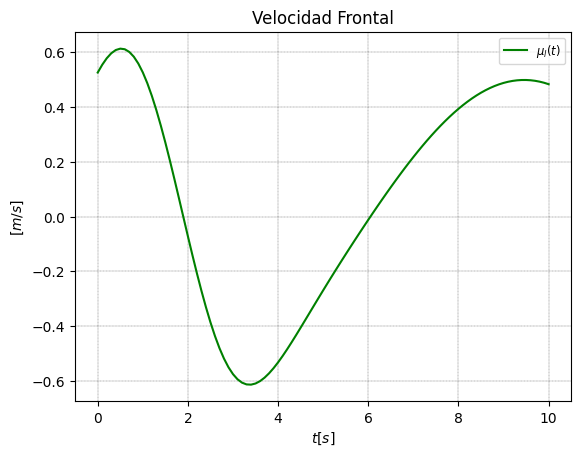

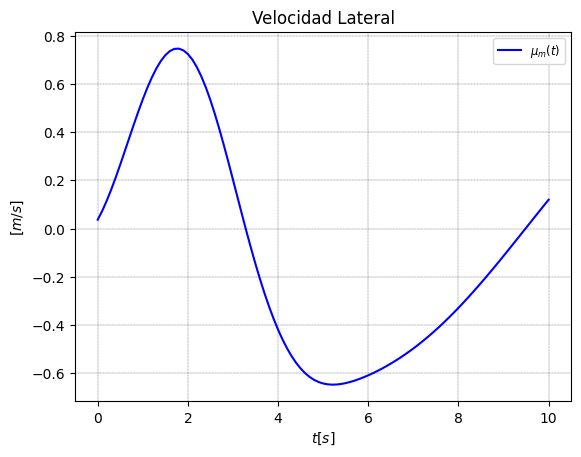

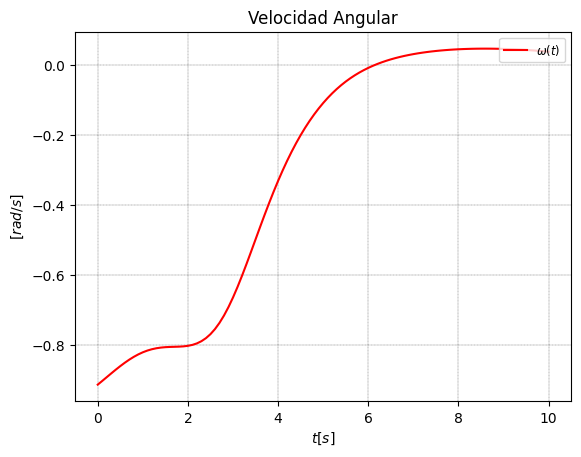

In [44]:
grafica('default','Velocidad Frontal',t[0,:],ul[0,:],'$\mu_l(t)$','$t[s]$','$[m/s]$','g')
grafica('default','Velocidad Lateral',t[0,:],um[0,:],'$\mu_m(t)$','$t[s]$','$[m/s]$','b')
grafica('default','Velocidad Angular',t[0,:],w[0,:],'$\omega(t)$','$t[s]$','$[rad/s]$','r')

#### Velocidades de cada rueda del robot

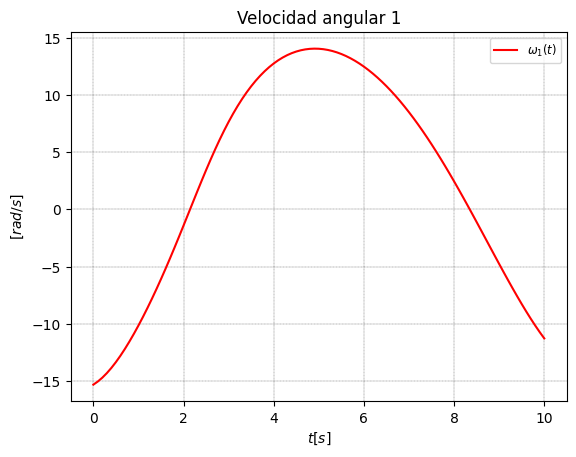

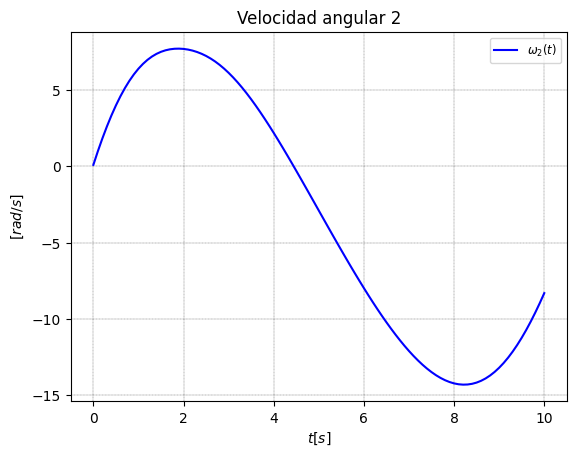

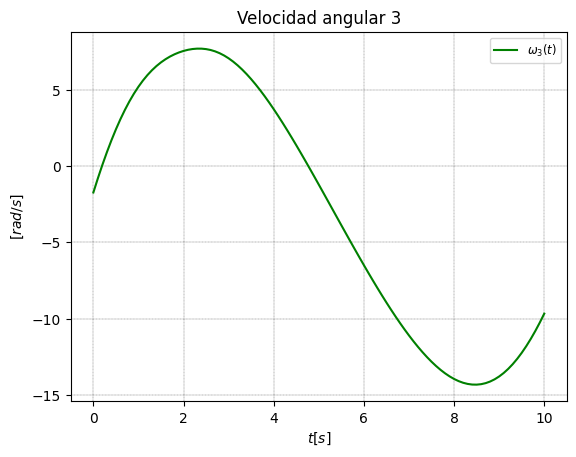

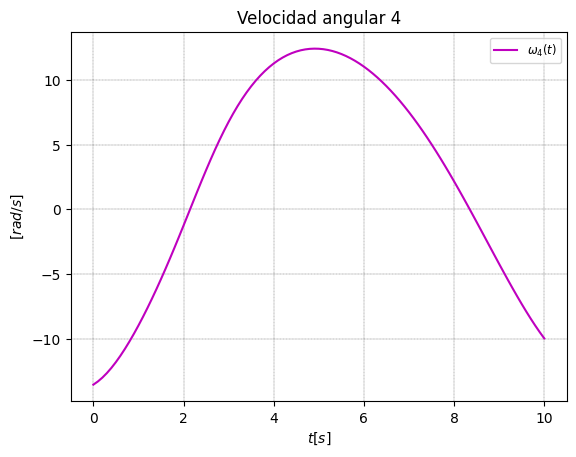

In [29]:
grafica('default','Velocidad angular 1',t[0,:],w_1[0,:],'$\omega_{1}(t)$','$t[s]$','$[rad/s]$','r')
grafica('default','Velocidad angular 2',t[0,:],w_2[0,:],'$\omega_{2}(t)$','$t[s]$','$[rad/s]$','b')
grafica('default','Velocidad angular 3',t[0,:],w_3[0,:],'$\omega_{3}(t)$','$t[s]$','$[rad/s]$','g')
grafica('default','Velocidad angular 4',t[0,:],w_4[0,:],'$\omega_{4}(t)$','$t[s]$','$[rad/s]$','m')